**<h2 style='color:red'>Titanic: Simple Models For Beginners With EDA</h2>**
* ** 1- Introduction **
* ** 2- Data Preparation **
* ** 3- Data Visualization **
* ** 4- Preprocessing data for machine learning **
* ** 5- Machine Learning **
* ** 6- Submitting **
<hr>

**Introduction**<br>
This is the legendary Titanic ML competition – the best, first challenge for you to dive into ML competitions and familiarize yourself with how the Kaggle platform works.<br>
**Goal**
The competition is simple: use machine learning to create a model that predicts which passengers survived the Titanic shipwreck.

# Data Preparation

In [1]:
# Disabling warnings
import warnings
warnings.simplefilter("ignore")

In [2]:
# Import Main libraries
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Import Visualization lib.
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [3]:
import os
print(os.listdir('../input'))

['gender_submission.csv', 'test.csv', 'train.csv']


In [4]:
# set our Dataframe
train_df = pd.read_csv('../input/train.csv')
test_df = pd.read_csv('../input/test.csv')
sub = pd.read_csv('../input/gender_submission.csv')

In [5]:
# Show first 5 rows of train data
train_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
# data size
print("Train Data Size: ", train_df.shape)
print("Test Data Size:  ", test_df.shape)

Train Data Size:  (891, 12)
Test Data Size:   (418, 11)


In [7]:
# Show if any NAN data
train_df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [8]:
test_df.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

1- Thier is more NAN value in "Cabin", "Age" columns.
2- we did not need "PassengerId" columns.

So we need to fix that

Fix Data using 3 various methods. 

In [9]:
from sklearn.impute import SimpleImputer

imputer = SimpleImputer(np.nan, "mean")

train_df['Age'] = imputer.fit_transform(np.array(train_df['Age']).reshape(891, 1)) # 1st
train_df.Embarked.fillna(method='ffill', inplace=True) # 2nd
train_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True) # 3rd

test_df['Age'] = imputer.fit_transform(np.array(test_df['Age']).reshape(418, 1))
test_df.Embarked.fillna(method='ffill', inplace=True)
test_df.Fare.fillna(method='ffill', inplace=True)
test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

SimpleImputer is sklearn library for Imputation of missing values
You Can find all of them here:
https://scikit-learn.org/stable/modules/impute.html#univariate-feature-imputation

In [10]:
"""trn_mid = train_df.Age.median() # set median value

# fill NAN data
train_df.Age.fillna(trn_mid, inplace=True)
train_df.Embarked.fillna(method='ffill', inplace=True)
train_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)

tst_mid = test_df.Age.median() # set median value

# fill NAN data
test_df.Age.fillna(tst_mid, inplace=True)
test_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)"""

"trn_mid = train_df.Age.median() # set median value\n\n# fill NAN data\ntrain_df.Age.fillna(trn_mid, inplace=True)\ntrain_df.Embarked.fillna(method='ffill', inplace=True)\ntrain_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)\n\ntst_mid = test_df.Age.median() # set median value\n\n# fill NAN data\ntest_df.Age.fillna(tst_mid, inplace=True)\ntest_df.drop(['PassengerId', 'Name', 'Cabin'], axis=1, inplace=True)"

# Data Visualization

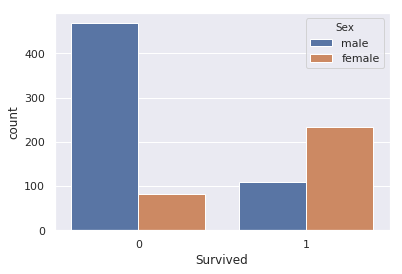

In [11]:
sns.countplot(x='Survived', hue='Sex', data=train_df)

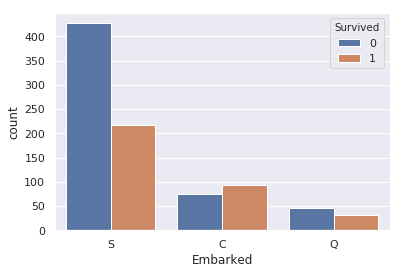

In [12]:
sns.countplot(x='Embarked', hue='Survived', data=train_df)

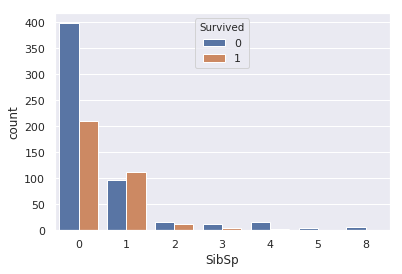

In [13]:
sns.countplot(x='SibSp', hue='Survived', data=train_df)

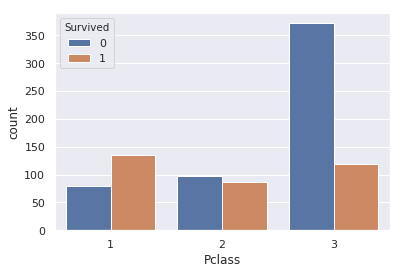

In [14]:
sns.countplot(x='Pclass', hue='Survived', data=train_df)

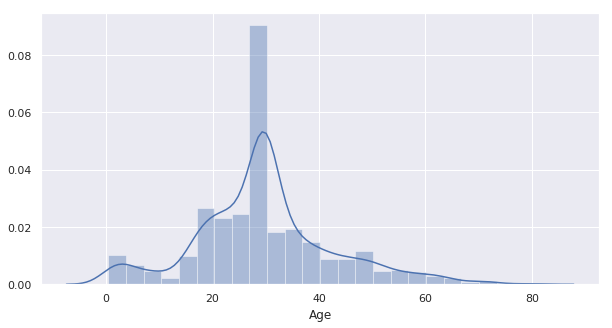

In [15]:
plt.figure(figsize=(10,5))
sns.distplot(train_df['Age'], bins=24, color='b')

# Preprocessing data for machine learning

In [16]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 9 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Embarked    891 non-null object
dtypes: float64(2), int64(4), object(3)
memory usage: 62.7+ KB


As you see 3 columns have "object" data type. So we must convert it to numbers.

In [17]:
objects_cols = train_df.select_dtypes("object").columns
objects_cols

Index(['Sex', 'Ticket', 'Embarked'], dtype='object')

Encode target labels with value between 0 and (n_classes - 1).

In [18]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
train_df[objects_cols] = train_df[objects_cols].apply(le.fit_transform)
test_df[objects_cols] = test_df[objects_cols].apply(le.fit_transform)
train_df[objects_cols].head()

,Sex,Ticket,Embarked
0,1,523,2
1,0,596,0
2,0,669,2
3,0,49,2
4,1,472,2


In [19]:
train_df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,0,3,1,22.0,1,0,523,7.2500,2
1,1,1,0,38.0,1,0,596,71.2833,0
2,1,3,0,26.0,0,0,669,7.9250,2
3,1,1,0,35.0,1,0,49,53.1000,2
4,0,3,1,35.0,0,0,472,8.0500,2


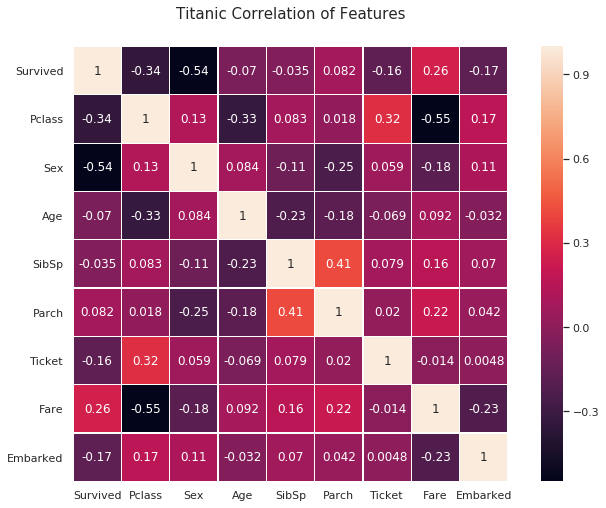

In [20]:
plt.figure(figsize=(12, 8))
plt.title('Titanic Correlation of Features', y=1.05, size=15)
sns.heatmap(train_df.corr(), linewidths=0.1, vmax=1.0, 
            square=True, linecolor='white', annot=True)

In [21]:
from sklearn.model_selection import train_test_split, cross_val_score

from sklearn.preprocessing import StandardScaler

from xgboost import XGBClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from sklearn.metrics import accuracy_score

In [22]:
# Machine Learning 
X = train_df.drop(['Survived'], 1).values
y = train_df['Survived'].values

In [23]:
scale = StandardScaler()
scale.fit(X)

X = scale.transform(X)

# Machine Learing

In [24]:
# Split data to 80% training data and 20% of test to check the accuracy of our model
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1/3, random_state=0)

Start modeling.

Class Model Idea from "Heart Disease - Classifications" kernel here:
https://www.kaggle.com/elcaiseri/heart-disease-classifications

In [25]:
class Model:
    def __init__(self, model):
        self.model = model
        self.X, self.y = X, y
        self.X_train, self.X_test, self.y_train, self.y_test = X_train, X_test, y_train, y_test
        
        self.train()
    
    def model_name(self):
        model_name = type(self.model).__name__
        return model_name
        
    def cross_validation(self, cv=5):
        print(f"Evaluate {self.model_name()} score by cross-validation...")
        CVS = cross_val_score(self.model, self.X, self.y, scoring='accuracy', cv=cv)
        print(CVS)
        print("="*60, "\nMean accuracy of cross-validation: ", CVS.mean())
    
    def train(self):
        print(f"Training {self.model_name()} Model...")
        self.model.fit(X_train, y_train)
        print("Model Trained.")
        
    def prediction(self, test_x=None, test=False):
        if test == False:
            y_pred = self.model.predict(self.X_test)
        else:
            y_pred = self.model.predict(test_x)
            
        return y_pred
    
    def accuracy(self):
        y_pred = self.prediction()
        y_test = self.y_test
        
        acc = accuracy_score(y_pred, y_test)
        print(f"{self.model_name()} Model Accuracy: ", acc)

In [26]:
xgb = XGBClassifier()
xgb = Model(xgb)

Training XGBClassifier Model...
Model Trained.


In [27]:
xgb.cross_validation()

Evaluate XGBClassifier score by cross-validation...
[0.80446927 0.82681564 0.84269663 0.81460674 0.86440678]
Mean accuracy of cross-validation:  0.8305990133297302


In [28]:
xgb.accuracy()

XGBClassifier Model Accuracy:  0.8383838383838383


In [29]:
gnb = GaussianNB()
gnb = Model(gnb)

Training GaussianNB Model...
Model Trained.


In [30]:
gnb.cross_validation()

Evaluate GaussianNB score by cross-validation...
[0.74301676 0.73184358 0.78089888 0.80337079 0.80225989]
Mean accuracy of cross-validation:  0.7722779770245057


In [31]:
gnb.accuracy()

GaussianNB Model Accuracy:  0.7777777777777778


In [32]:
svc = SVC()
svc = Model(svc)

Training SVC Model...
Model Trained.


In [33]:
svc.cross_validation()

Evaluate SVC score by cross-validation...
[0.82681564 0.80446927 0.80337079 0.81460674 0.85310734]
Mean accuracy of cross-validation:  0.8204739577847546


In [34]:
svc.accuracy()

SVC Model Accuracy:  0.8080808080808081


In [35]:
from sklearn.ensemble import RandomForestClassifier
rfc = RandomForestClassifier()
rfc = Model(rfc)
rfc.cross_validation()
rfc.accuracy()

Training RandomForestClassifier Model...
Model Trained.
Evaluate RandomForestClassifier score by cross-validation...
[0.81564246 0.79329609 0.84831461 0.80898876 0.85875706]
Mean accuracy of cross-validation:  0.8249997960838886
RandomForestClassifier Model Accuracy:  0.8047138047138047


# Submitting

In [36]:
test_df.head()

,Pclass,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,3,1,34.5,0,0,152,7.8292,1
1,3,0,47.0,1,0,221,7.0000,2
2,2,1,62.0,0,0,73,9.6875,1
3,3,1,27.0,0,0,147,8.6625,2
4,3,0,22.0,1,1,138,12.2875,2


In [37]:
# Predict our file test
test_X = test_df.values
test_X = scale.transform(test_X)

In [38]:
xgb_pred = xgb.prediction(test_x=test_X, test=True)
gnb_pred = gnb.prediction(test_x=test_X, test=True)
svc_pred = svc.prediction(test_x=test_X, test=True)
rfc_pred = rfc.prediction(test_x=test_X, test=True)

In [39]:
sub.head()
sub.to_csv('submission.csv', index=False)
sub.head()

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1


In [40]:
sub['Survived'] = xgb_pred # Best Submission (Top 5% LB)
sub.to_csv('xgb_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [41]:
sub['Survived'] = gnb_pred
sub.to_csv('gnb_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [42]:
sub['Survived'] = svc_pred
sub.to_csv('svc_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,1
2,894,0
3,895,0
4,896,1
5,897,0
6,898,1
7,899,0
8,900,1
9,901,0


In [43]:
sub['Survived'] = rfc_pred
sub.to_csv('rfc_submission.csv', index=False)
sub.head(10)

,PassengerId,Survived
0,892,0
1,893,0
2,894,0
3,895,0
4,896,0
5,897,0
6,898,0
7,899,0
8,900,0
9,901,0


<h3>Thanks For Being Here.  <span style='color:red'>UPVOTE</span>  If Interested .. Feel Free In Comments</h3>